## LATAR BELAKANG

Data ini merupakan kumpulan laporan tindakan kriminal yang ditangani oleh Boston Police Department (BPD). Pengumpulan data dimulai dari tanggal 14 Juni 2015 - 3 September 2018. Dengan banyaknya kejahatan yang terjadi, petugas BPD mengalami kesulitan dalam menurunkan tindakan kriminal yang terjadi di kota Boston.

## PERUMUSAN MASALAH

1. Tindakan kriminal apa yang paling sering terjadi? 
2. Kapan tindakan kriminal paling banyak terjadi?
3. Dimana tindakan kriminal paling banyak terjadi?
4. Distrik mana yang paling banyak menangani kasus penembakan?

BATASAN MASALAH: Data yang akan diolah adalah tindakan kriminal yang termasuk PART I dan PART II saja. (Alasan akan dijelaskan lebih detail pada bagian kesimpulan data understanding).

## DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import datetime
import plotly.express as px
from folium.plugins import HeatMap
pd.set_option('display.max_rows', None)

In [2]:
df=pd.read_csv('/Users/rahayukristiyanti/Documents/PYTHON/modul2_capstone_data_crime.csv',encoding='latin1')
display(df.head(),df.tail())

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION  \
0      I182070945           619               Larceny    LARCENY ALL OTHERS   
1      I182070943          1402             Vandalism             VANDALISM   
2      I182070941          3410                 Towed   TOWED MOTOR VEHICLE   
3      I182070940          3114  Investigate Property  INVESTIGATE PROPERTY   
4      I182070938          3114  Investigate Property  INVESTIGATE PROPERTY   

  DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  \
0      D14            808      NaN  2018-09-02 13:00:00  2018      9   
1      C11            347      NaN  2018-08-21 00:00:00  2018      8   
2       D4            151      NaN  2018-09-03 19:27:00  2018      9   
3       D4            272      NaN  2018-09-03 21:16:00  2018      9   
4       B3            421      NaN  2018-09-03 21:05:00  2018      9   

  DAY_OF_WEEK  HOUR    UCR_PART       STREET        Lat       Long  \
0      Sunday    13    Part One   LINCOLN ST  42.357791 -71.139371   
1     Tuesday     0    Part Two     HECLA ST  42.306821 -71.060300   
2      Monday    19  Part Three  CAZENOVE ST  42.346589 -71.072429   
3      Monday    21  Part Three   NEWCOMB ST  42.334182 -71.078664   
4      Monday    21  Part Three     DELHI ST  42.275365 -71.090361   

                      Location  
0  (42.35779134, -71.13937053)  
1  (42.30682138, -71.06030035)  
2  (42.34658879, -71.07242943)  
3  (42.33418175, -71.07866441)  
4  (42.27536542, -71.09036101)

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP  \
319068   I050310906-00          3125    Warrant Arrests   
319069   I030217815-08           111           Homicide   
319070   I030217815-08          3125    Warrant Arrests   
319071   I010370257-00          3125    Warrant Arrests   
319072       142052550          3125    Warrant Arrests   

                        OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
319068                       WARRANT ARREST       D4            285      NaN   
319069  MURDER, NON-NEGLIGIENT MANSLAUGHTER      E18            520      NaN   
319070                       WARRANT ARREST      E18            520      NaN   
319071                       WARRANT ARREST      E13            569      NaN   
319072                       WARRANT ARREST       D4            903      NaN   

           OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
319068  2016-06-05 17:25:00  2016      6      Sunday    17  Part Three   
319069  2015-07-09 13:38:00  2015      7    Thursday    13    Part One   
319070  2015-07-09 13:38:00  2015      7    Thursday    13  Part Three   
319071  2016-05-31 19:35:00  2016      5     Tuesday    19  Part Three   
319072  2015-06-22 00:12:00  2015      6      Monday     0  Part Three   

                   STREET        Lat       Long                     Location  
319068        COVENTRY ST  42.336951 -71.085748  (42.33695098, -71.08574813)  
319069           RIVER ST  42.255926 -71.123172  (42.25592648, -71.12317207)  
319070           RIVER ST  42.255926 -71.123172  (42.25592648, -71.12317207)  
319071  NEW WASHINGTON ST  42.302333 -71.111565  (42.30233307, -71.11156487)  
319072      WASHINGTON ST  42.333839 -71.080290  (42.33383935, -71.08029038)

In [3]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

Daftar nama kolom yang terdapat pada data 'crime' dan penjelasannya:
* INCIDENT_NUMBER: Nomor insiden yang menandai satu kejadian yang dilaporkan.
* OFFENSE_CODE: Kode tindak kriminal 
* OFFENSE_CODE_GROUP: Jenis tindak kriminal
* OFFENSE_DESCRIPTION: Penjelasan tindak kriminal
* DISTRICT: Boston police service areas (BPD dibagi menjadi beberapa area pengawasan)
* REPORTING_AREA: Kode area pelaporan insiden
* SHOOTING: Apakah ada terjadi penembakan dalam insiden
* OCCURRED_ON_DATE: Waktu terjadinya insiden
* YEAR: Waktu terjadinya insiden (tahun)
* MONTH: Waktu terjadinya insiden (bulan)
* DAY_OF_WEEK: Waktu terjadinya insiden (hari)
* HOUR: Waktu terjadinya insiden (jam)
* UCR_PART: Klasifikasi tindak kriminal berdasarkan Uniform Crime Reporting System 
* STREET: Nama jalan di mana insiden terjadi
* Lat: Latitude lokasi insiden terjadi
* Long: Longitude lokasi insiden terjadi
* Location: Latitude dan Longitude lokasi insiden terjadi

## DATA UNDERSTANDING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [5]:
display(df.describe(), df.describe(include='object'))

OFFENSE_CODE           YEAR          MONTH           HOUR  \
count  319073.000000  319073.000000  319073.000000  319073.000000   
mean     2317.546956    2016.560586       6.609719      13.118205   
std      1185.285543       0.996344       3.273691       6.294205   
min       111.000000    2015.000000       1.000000       0.000000   
25%      1001.000000    2016.000000       4.000000       9.000000   
50%      2907.000000    2017.000000       7.000000      14.000000   
75%      3201.000000    2017.000000       9.000000      18.000000   
max      3831.000000    2018.000000      12.000000      23.000000   

                 Lat           Long  
count  299074.000000  299074.000000  
mean       42.214381     -70.908272  
std         2.159766       3.493618  
min        -1.000000     -71.178674  
25%        42.297442     -71.097135  
50%        42.325538     -71.077524  
75%        42.348624     -71.062467  
max        42.395042      -1.000000

INCIDENT_NUMBER               OFFENSE_CODE_GROUP  \
count           319073                           319073   
unique          282517                               67   
top         I162030584  Motor Vehicle Accident Response   
freq                13                            37132   

                  OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
count                          319073   317308         319073     1019   
unique                            244       12            879        1   
top     SICK/INJURED/MEDICAL - PERSON       B2                       Y   
freq                            18783    49945          20250     1019   

           OCCURRED_ON_DATE DAY_OF_WEEK    UCR_PART         STREET  \
count                319073      319073      318983         308202   
unique               233229           7           4           4657   
top     2017-06-01 00:00:00      Friday  Part Three  WASHINGTON ST   
freq                     29       48495      158553          14194   

                        Location  
count                     319073  
unique                     18194  
top     (0.00000000, 0.00000000)  
freq                       19999

In [6]:
# Data unik di tiap kolom dan jumlahnya

pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0       INCIDENT_NUMBER            282517   
1          OFFENSE_CODE               222   
2    OFFENSE_CODE_GROUP                67   
3   OFFENSE_DESCRIPTION               244   
4              DISTRICT                12   
5        REPORTING_AREA               879   
6              SHOOTING                 1   
7      OCCURRED_ON_DATE            233229   
8                  YEAR                 4   
9                 MONTH                12   
10          DAY_OF_WEEK                 7   
11                 HOUR                24   
12             UCR_PART                 4   
13               STREET              4657   
14                  Lat             18178   
15                 Long             18178   
16             Location             18194   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Unique Sample  
0                                                                                                                                                                                                                                                                                                    

In [7]:
# Jumlah missing values di tiap kolom 

df.isna().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [8]:
# Jumlah data unik dalam kolom 'UCR PART' dalam hitungan persen.
df['UCR_PART'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

Part Three    49.7%
Part Two      30.6%
Part One      19.3%
Other          0.4%
Name: UCR_PART, dtype: object

In [9]:
# Jumlah data unik dalam kolom 'UCR PART'.
df['UCR_PART'].value_counts()


Part Three    158553
Part Two       97569
Part One       61629
Other           1232
Name: UCR_PART, dtype: int64

__KESIMPULAN DATA UNDERSTANDING__

Kesimpulan yang bisa kita dapatkan dari informasi-informasi di atas adalah:
* Dataset 'crime' memiliki 17 kolom dan 319.073 baris
* Beberapa kolom, yaitu 'DISTRICT, 'SHOOTING', 'UCR PART', 'STREET', 'LAT', 'LONG', memiliki data kosong yang ditandai dengan data NaN, 0, atau -1.
* Kolom 'INCIDENT_NUMBER' berisikan nomor untuk setiap kejadian yang dilaporkan dan terdapat 36.556 data yang duplikat. Hal ini mungkin disebabkan karena insiden yang sama sering kali dilaporkan oleh beberapa petugas  yang berbeda. Untuk menjawab perumusan masalah, data ini tidak relevan untuk analisis, oleh karena itu kolom ini akan dihapus.
* Kolom 'OFFENSE_CODE', 'REPORTING_AREA' juga akan dihapus karena tidak relevan dalam analisis data untuk menjawab perumusan masalah. 
* Perlu diperhatikan bahwa dalam kolom 'Long' dan 'Lat' terdapat isian dengan angka -1 dan isian kosong. Kedua kolom ini akan digunakan dalam analisis, sementara kolom 'Location' tidak akan digunakan.
* Kolom 'UCR PART' hanya akan menggunakan data PART I dan PART II saja sebagai batasan masalah. 

BATASAN MASALAH: Data yang akan diolah adalah kejahatan yang termasuk PART I dan PART II saja, mengapa?
1. Kedua tipe klasifikasi inilah yang masuk dalam Uniform Crime Reporting (UCR) Program di Amerika Serikat (berdasarkan Uniform Crime Reporting Handbook yang dikeluarkan oleh US Department of Justice, Federal Bureau of Investigation). Dalam ketentuannya, UCR dibagi menjadi dua klasifikasi utama, yaitu:
* Part I (serious crimes: murder, rape, aggravated assault, robbery, burglary, larceny, motor vehicle theft, arson, human trafficking)
* Part II (less serious crimes: forgery and founterfeiting, fraud, embezzlement, stolen property, vandalism, weapons, prostitution, sex offense, drug abuses, gambling, offenses against family and children, driving under the influence, liquor laws, disorderly conduct, vagrancy, juvenile, and all other offenses) 
2. Berdasarkan perhitungan value_counts di atas, jumlah tindak kriminal yang termasuk dalam klasifikasi Part III mencapai 49.7%, hampir setengah data keseluruhan, artinya jika PART III dimasukkan dalam analisis, hasilnya akan sangat berpengaruh. Sementara PART III dan 'Others' merupakan tipe tindak kriminal yang bisa dikatakan tidak memberikan dampak sefatal kejahatan tipe PART I dan PART II. 
3. Melihat bahayanya kejahatan PART I dan II, maka sebaiknya kedua tipe kejahatan ini yang menjadi prioritas utama untuk ditangani. Jumlah petugas polisi tentu terbatas dan perlu adanya prioritas dalam menangani suatu masalah, oleh karena itu dalam kasus ini kita akan fokus pada kejahatan PART I dan II saja. 

## DATA CLEANING

In [10]:
# Menampilkan tindakan kriminal yang termasuk UCR Part One dan Part Two 
df=df.loc[(df['UCR_PART'] == 'Part One')|(df['UCR_PART'] == 'Part Two')]

# Menghapus kolom yang tidak digunakan
df=df.drop(['INCIDENT_NUMBER','OFFENSE_CODE','REPORTING_AREA','Location'], axis=1)
df.head(10)

OFFENSE_CODE_GROUP                     OFFENSE_DESCRIPTION  \
0                        Larceny                      LARCENY ALL OTHERS   
1                      Vandalism                               VANDALISM   
6                     Auto Theft                              AUTO THEFT   
8                        Robbery                        ROBBERY - STREET   
13                         Other               THREATS TO DO BODILY HARM   
18                         Other               THREATS TO DO BODILY HARM   
19    Larceny From Motor Vehicle   LARCENY THEFT FROM MV - NON-ACCESSORY   
24          Residential Burglary       BURGLARY - RESIDENTIAL - NO FORCE   
27                Simple Assault                ASSAULT SIMPLE - BATTERY   
28  Restraining Order Violations  VIOL. OF RESTRAINING ORDER W NO ARREST   

   DISTRICT SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  \
0       D14      NaN  2018-09-02 13:00:00  2018      9      Sunday    13   
1       C11      NaN  2018-08-21 00:00:00  2018      8     Tuesday     0   
6        B2      NaN  2018-09-03 21:25:00  2018      9      Monday    21   
8        C6      NaN  2018-09-03 20:48:00  2018      9      Monday    20   
13       B3      NaN  2018-09-03 20:39:00  2018      9      Monday    20   
18       B2      NaN  2018-09-03 19:52:00  2018      9      Monday    19   
19       B2      NaN  2018-09-02 18:00:00  2018      9      Sunday    18   
24       B2      NaN  2018-09-03 18:38:00  2018      9      Monday    18   
27      C11      NaN  2018-09-03 18:34:00  2018      9      Monday    18   
28      C11      NaN  2018-09-03 18:34:00  2018      9      Monday    18   

    UCR_PART             STREET        Lat       Long  
0   Part One         LINCOLN ST  42.357791 -71.139371  
1   Part Two           HECLA ST  42.306821 -71.060300  
6   Part One        NORMANDY ST  42.306072 -71.082733  
8   Part One  MASSACHUSETTS AVE  42.331521 -71.070853  
13  Part Two        WOODROW AVE  42.286470 -71.087147  
18  Part Two        HORADAN WAY  42.333717 -71.096658  
19  Part One         SHIRLEY ST  42.325695 -71.068168  
24  Part One    ANNUNCIATION RD  42.335062 -71.093168  
27  Part Two       ANNAPOLIS ST  42.317319 -71.061509  
28  Part Two       ANNAPOLIS ST  42.317319 -71.061509

In [11]:
# Konversi jenis data pada kolom 'OCCURED_ON_DATE' dari object menjadi format waktu

df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159198 entries, 0 to 319069
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   OFFENSE_CODE_GROUP   159198 non-null  object        
 1   OFFENSE_DESCRIPTION  159198 non-null  object        
 2   DISTRICT             158466 non-null  object        
 3   SHOOTING             847 non-null     object        
 4   OCCURRED_ON_DATE     159198 non-null  datetime64[ns]
 5   YEAR                 159198 non-null  int64         
 6   MONTH                159198 non-null  int64         
 7   DAY_OF_WEEK          159198 non-null  object        
 8   HOUR                 159198 non-null  int64         
 9   UCR_PART             159198 non-null  object        
 10  STREET               154393 non-null  object        
 11  Lat                  150347 non-null  float64       
 12  Long                 150347 non-null  float64       
dtypes: datetime64[

__MISSING VALUES__

In [12]:
# Persentase missing value di tiap kolom

df.isna().sum()/df.shape[0]*100

OFFENSE_CODE_GROUP      0.000000
OFFENSE_DESCRIPTION     0.000000
DISTRICT                0.459805
SHOOTING               99.467958
OCCURRED_ON_DATE        0.000000
YEAR                    0.000000
MONTH                   0.000000
DAY_OF_WEEK             0.000000
HOUR                    0.000000
UCR_PART                0.000000
STREET                  3.018254
Lat                     5.559743
Long                    5.559743
dtype: float64

<AxesSubplot: >

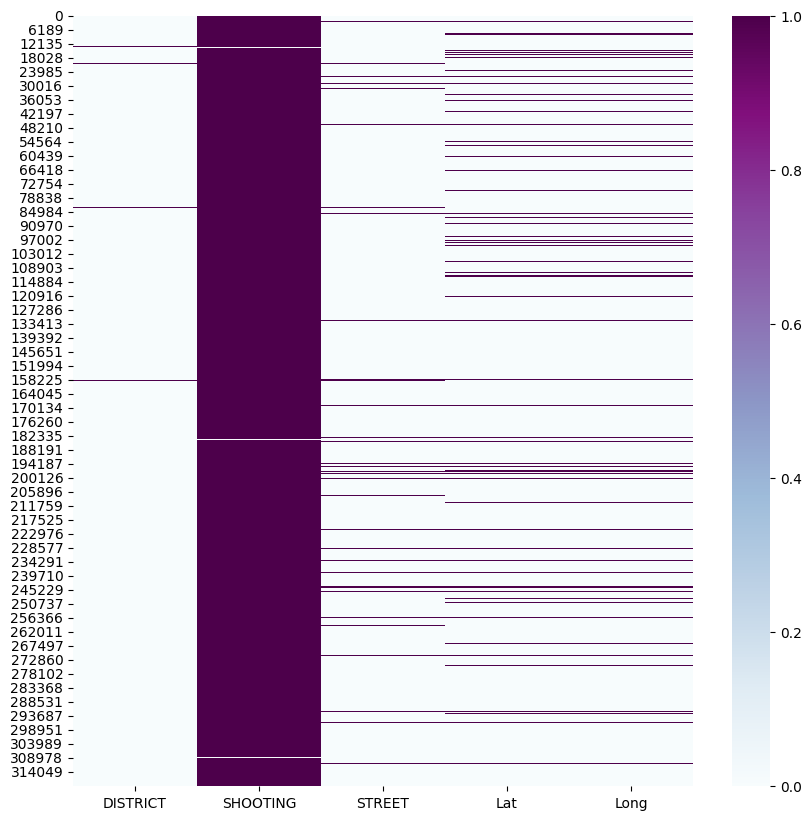

In [13]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['DISTRICT','SHOOTING','STREET','Lat','Long']].isna(), cmap='BuPu')


Berdasarkan perhitungan isna().sum() dan sebaran missing values pada gambar heatmap di atas, maka dapat diambil kesimpulan bahwa:
1. Kolom 'DISTRICT' memiliki jumlah missing values yang sangat sedikit, yaitu sekitar 0.49%. Tidak ada hubungan missing values pada kolom ini dengan kolom lainnya, bisa dikatakan ini termasuk dalam kategori MCAR (Missing Completely at Random). Oleh karena itu, missing values pada kolom ini akan ditangani dengan metode penghapusan data. 
2. Kolom 'SHOOTING' memiliki jumlah missing values yang sangat besar, yaitu sekitar 99.46%. Missing values pada kolom ini tidak bermasalah pada analisis untuk menjawab perumusan masalah karena hanya akan menggunakan data "Y" saja. Untuk missing values sisanya akan diisi dengan nilai "N" supaya tidak kosong dan tidak akan dipakai dalam analisis.
3. Kolom 'STREET' memiliki jumlah missing values sebesar 3.01% dan hampir sebagian besar berkaitan dengan kolom 'Long' dan 'Lat' di mana jika nama jalan tidak ada, maka kemungkinan besar data Long/Lat juga tidak ada (namun tidak berlaku sebaliknya). Dikarenakan jumlah missing valuesnya masih tergolong kecil (dalam range 5%), maka data missing values pada kolom ini akan dihapus saja. Cukup sulit juga memperkirakan jika harus mengisi datanya secara domain knowledge. 
4. Kolom 'Lat' dan 'Long' memiliki jumlah missing values sebesar 5.55%. Dikarenakan jumlah missing valuesnya masih tergolong kecil (dalam range 5%), maka data missing values pada kolom ini akan dihapus saja. Cukup sulit juga memperkirakan jika harus mengisi datanya secara domain knowledge. 

In [14]:
# Menghapus data kosong pada kolom DISTRICT dan STREET

df.dropna(subset=['DISTRICT','STREET'],inplace=True)
df.isna().sum()/df.shape[0]*100

OFFENSE_CODE_GROUP      0.000000
OFFENSE_DESCRIPTION     0.000000
DISTRICT                0.000000
SHOOTING               99.465154
OCCURRED_ON_DATE        0.000000
YEAR                    0.000000
MONTH                   0.000000
DAY_OF_WEEK             0.000000
HOUR                    0.000000
UCR_PART                0.000000
STREET                  0.000000
Lat                     3.083803
Long                    3.083803
dtype: float64

In [15]:
df.SHOOTING.fillna('N', inplace=True)
df.isna().sum()/df.shape[0]*100

OFFENSE_CODE_GROUP     0.000000
OFFENSE_DESCRIPTION    0.000000
DISTRICT               0.000000
SHOOTING               0.000000
OCCURRED_ON_DATE       0.000000
YEAR                   0.000000
MONTH                  0.000000
DAY_OF_WEEK            0.000000
HOUR                   0.000000
UCR_PART               0.000000
STREET                 0.000000
Lat                    3.083803
Long                   3.083803
dtype: float64

In [16]:
# Menggantikan nilai -1 pada kolomg Lat/Long dengan NaN agar bisa dihapus bersama dengan data kosong lainnya

df.Lat.replace(-1, None, inplace=True)
df.Long.replace(-1, None, inplace=True)

In [17]:
# Menghapus data kosong pada kolom Lat dan Long

df.dropna(subset=['Lat','Long'],inplace=True)

In [18]:
# Dapat dilihat bahwa missing values sudah tidak ada lagi.

df.isna().sum()/df.shape[0]*100

OFFENSE_CODE_GROUP     0.0
OFFENSE_DESCRIPTION    0.0
DISTRICT               0.0
SHOOTING               0.0
OCCURRED_ON_DATE       0.0
YEAR                   0.0
MONTH                  0.0
DAY_OF_WEEK            0.0
HOUR                   0.0
UCR_PART               0.0
STREET                 0.0
Lat                    0.0
Long                   0.0
dtype: float64

## DATA ANALYSIS

### 1. Tindakan kriminal yang paling sering terjadi?

In [19]:
def bar(categories,x,y,color,title,xlab,ylab):
    fig = px.bar(categories, x=x, y=y,
             color=color,
             height=400)
    fig.update_layout(
    title_text=title, 
    xaxis_title_text=xlab, 
    yaxis_title_text=ylab,
    bargap=0.2, 
    bargroupgap=0.1)
    fig.show()

In [20]:
Number_crimes = df['OFFENSE_CODE_GROUP'].value_counts()
values = Number_crimes.values
categories = pd.DataFrame(data=Number_crimes.index, columns=["OFFENSE_CODE_GROUP"])
categories['values'] = values

In [21]:
bar(categories,categories['OFFENSE_CODE_GROUP'][0:20],categories['values'][0:20],categories['OFFENSE_CODE_GROUP'][0:20],'20 Tindakan Kriminal yang Sering Terjadi di Kota Boston','Tindakan Kriminal','Jumlah Insiden')


Berdasarkan diagram barplot di atas dapat dilihat bahwa jenis kejahatan yang paling sering terjadi adalah Larceny, yaitu pencurian barang milik orang lain (tidak termasuk pencurian kendaraan bermotor) kemudian disusul oleh 'Others', 'Vandalisme','Simple Assault','Drug Violation', dan 'Larceny from Motor Vehicle', dst.

### 2. Kapan kejahatan paling banyak terjadi?

Text(-12.430555555555527, 0.5, 'Jumlah Insiden')

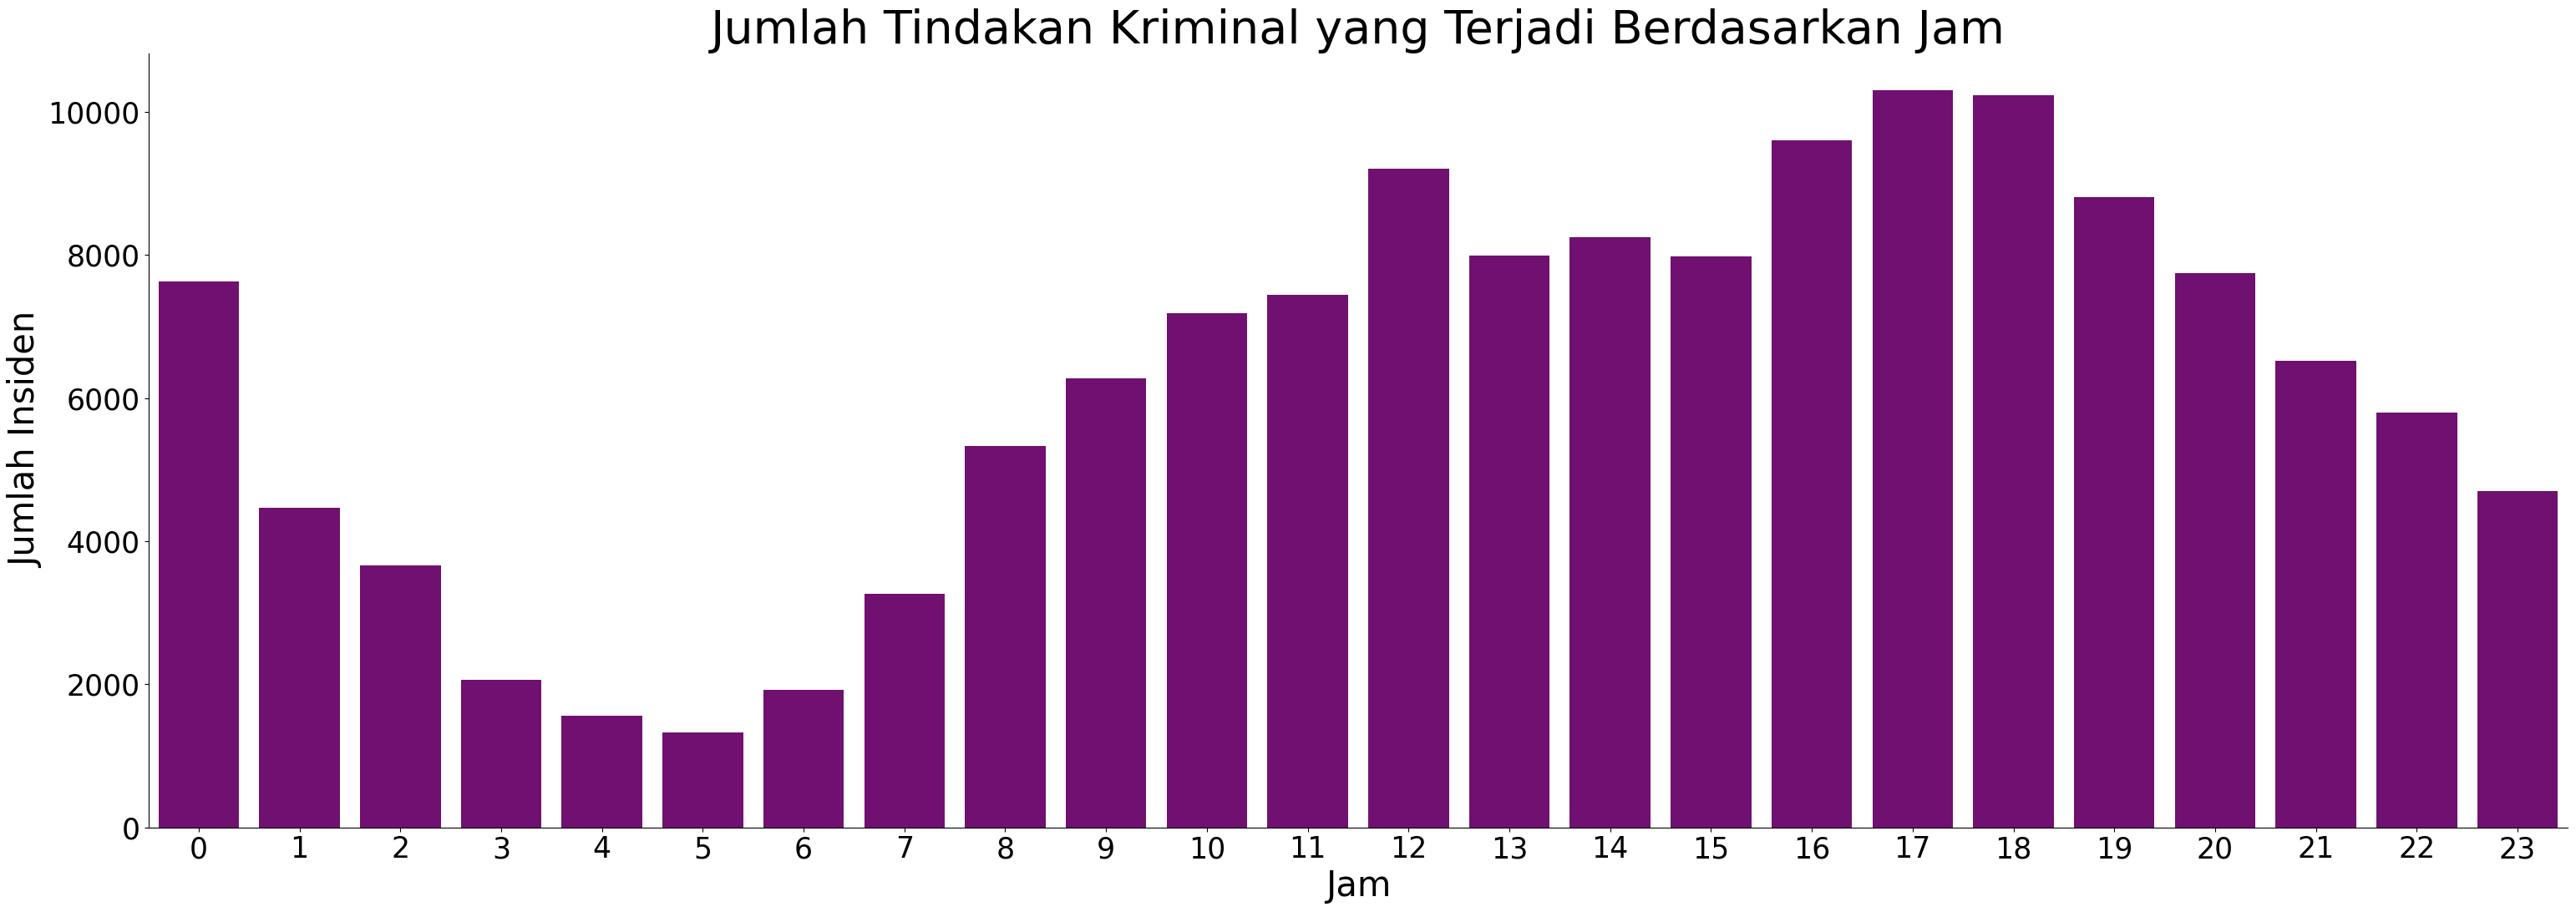

In [22]:
sns.catplot(x='HOUR',
           kind='count',
            height=10, 
            aspect=3,
            color='purple',
           data=df)
plt.xticks(size=25)
plt.yticks(size=25)
plt.title('Jumlah Tindakan Kriminal yang Terjadi Berdasarkan Jam',fontsize=40)
plt.xlabel('Jam', fontsize=30)
plt.ylabel('Jumlah Insiden', fontsize=30)

Text(-12.430555555555527, 0.5, 'Jumlah Insiden')

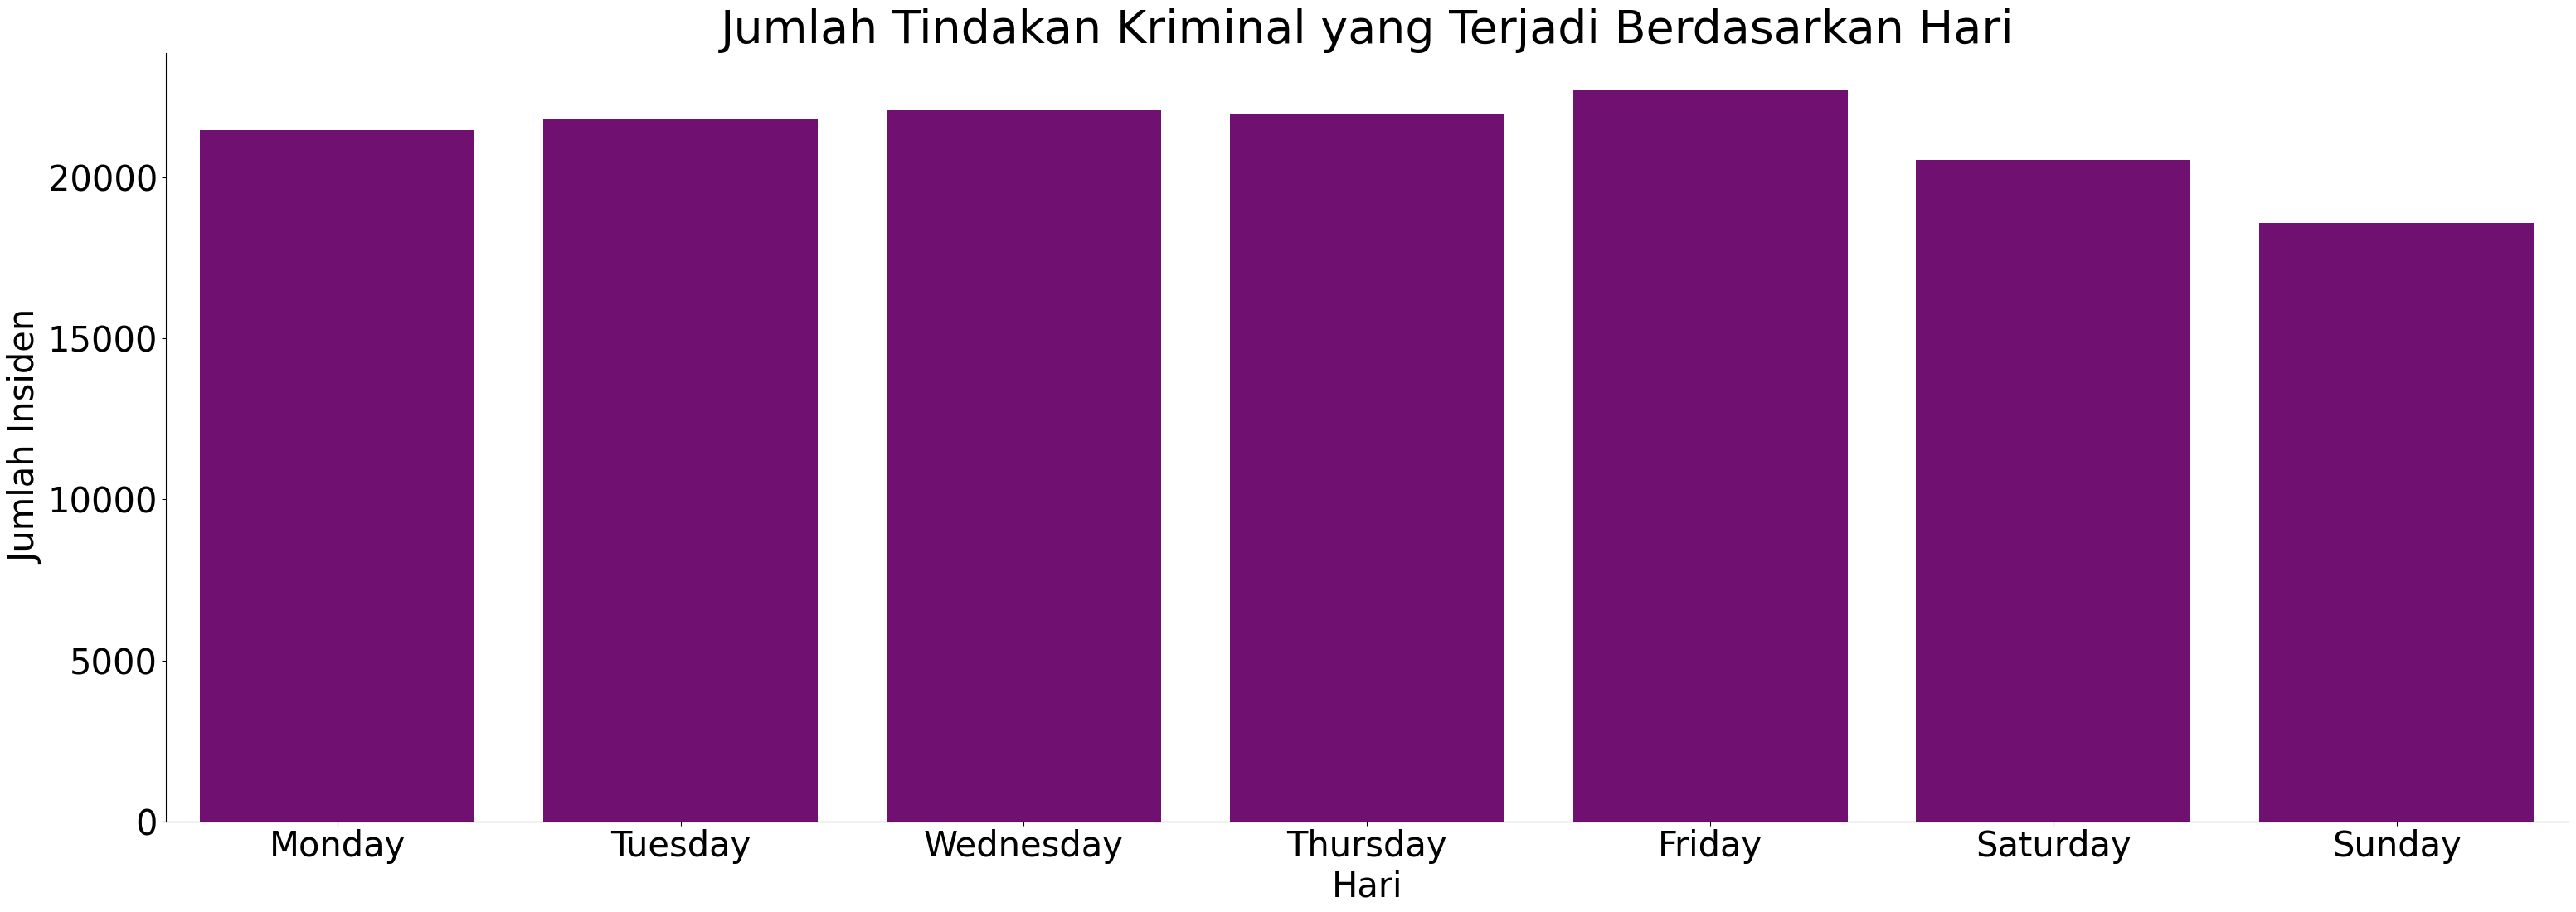

In [23]:
# Mengurutkan urutan hari sesuai urutan Senin-Minggu
df.DAY_OF_WEEK = pd.Categorical(df.DAY_OF_WEEK, 
                categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                ordered=True)

sns.catplot(x='DAY_OF_WEEK',
           kind='count',
            height=10, 
            aspect=3,
            color='purple',
           data=df)
plt.xticks(size=30)
plt.yticks(size=30)
plt.title('Jumlah Tindakan Kriminal yang Terjadi Berdasarkan Hari',fontsize=40)
plt.xlabel('Hari', fontsize=30)
plt.ylabel('Jumlah Insiden', fontsize=30)

Text(-12.555555555555527, 0.5, 'Jumlah Insiden')

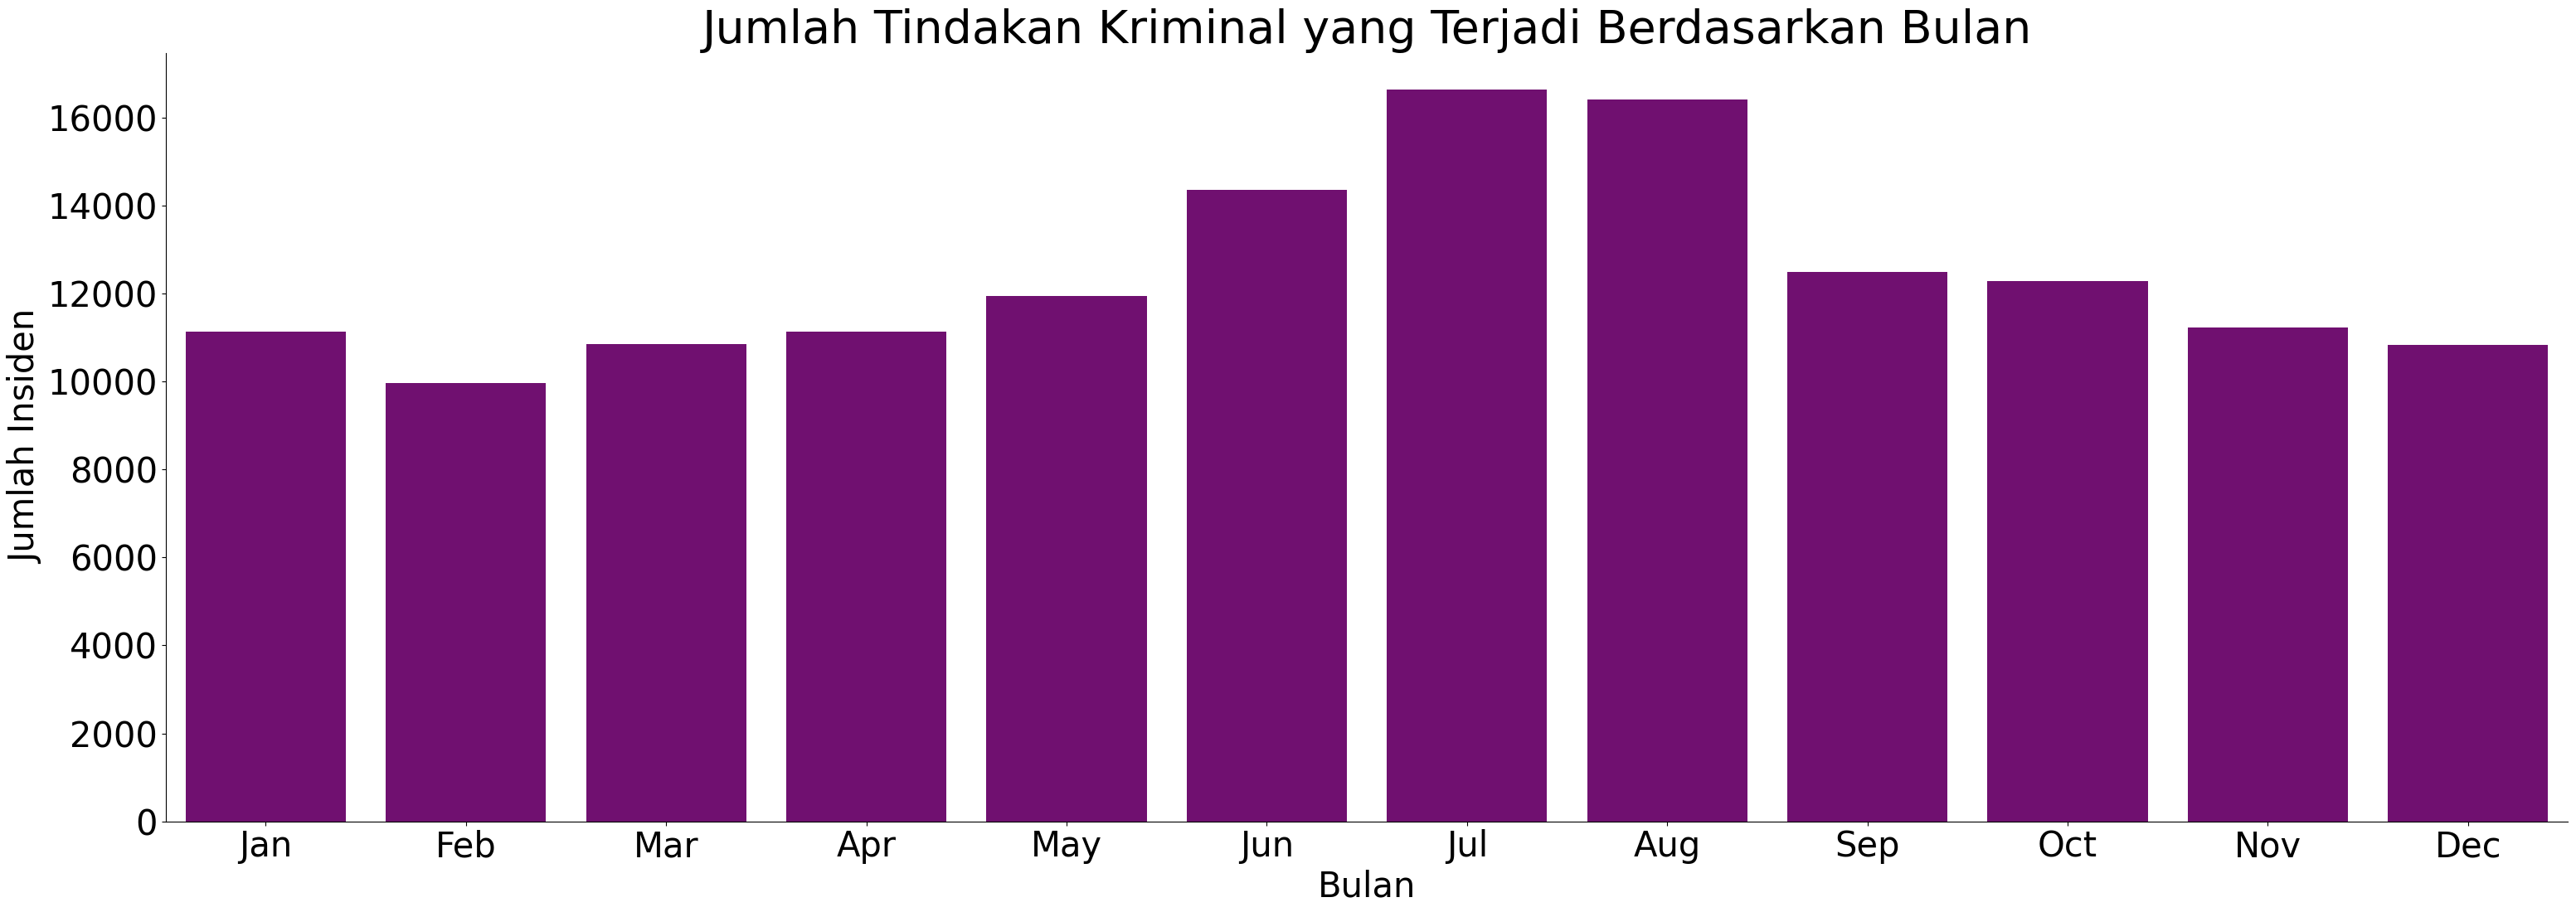

In [24]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.catplot(x='MONTH',
           kind='count',
            height=10, 
            aspect=3,
            color='purple',
           data=df)
plt.xticks(np.arange(12), months, size=30)
plt.yticks(size=30)
plt.title('Jumlah Tindakan Kriminal yang Terjadi Berdasarkan Bulan',fontsize=40)
plt.xlabel('Bulan', fontsize=30)
plt.ylabel('Jumlah Insiden', fontsize=30)

Berdasarkan ketiga diagram di atas, dapat kita lihat bahwa:
- Tindakan kriminal terjadi sepanjang hari dalam waktu 24 jam, namun memiliki peningkatan siginifikan di saat menjelang siang hari sampai menjelang malam hari lalu kemudian berangsur menurun sepanjang malam hari dan meningkat cukup drastis pukul 12 malam dan menurun cukup signifikan sampai waktu menjelang pagi hari di mana orang biasa mulai beraktivitas pukul 8.
- Berdasarkan waktu harian, tidak ada perbedaan signifikan kapan tindakan kriminal terjadi. Pada umumnya setiap hari terjadi insiden dalam jumlah yang relatif sama, hanya ada sedikit penurunan di akhir pekan dan sedikit kenaikan di hari Jumat.
- Berdasarkan waktu bulanan ada sedikit kenaikan jumlah insiden yang signifkan di bulan Juni-Agustus di Amerika Serikat. Bulan Juni-Agustus adalah masa dimana sekolah sedang libur dan cuaca sedang musim panas, itu ada masa dimana banyak orang berpergian ke luar rumah. 

### 3. Dimana kejahatan paling banyak terjadi?

In [25]:
boston_map = folium.Map(location=[42.3125,-71.0875], zoom_start = 12)

data_heatmap = df[['Lat','Long']]
data_heatmap = [[row['Lat'],row['Long']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=12).add_to(boston_map)
boston_map

Berdasarkan gambar heatmap di atas, dapat kita lihat bahwa beberapa daerah yang berwarna oranye dan kuning adalah daerah-daerah yang seringkali didapati insiden tindakan kriminal. Salah satu daerah yang paling "panas" adalah daerah pusat kota Boston. 

Gambar di bawah ini adalah pembagian BPD Service Areas District. Jika disesuaikan dengan lokasi distrik BPD, bisa kita lihat bahwa distrik A1,A15,A7 yang berpotensi mengalami lebih banyak insiden tindakan kriminal.

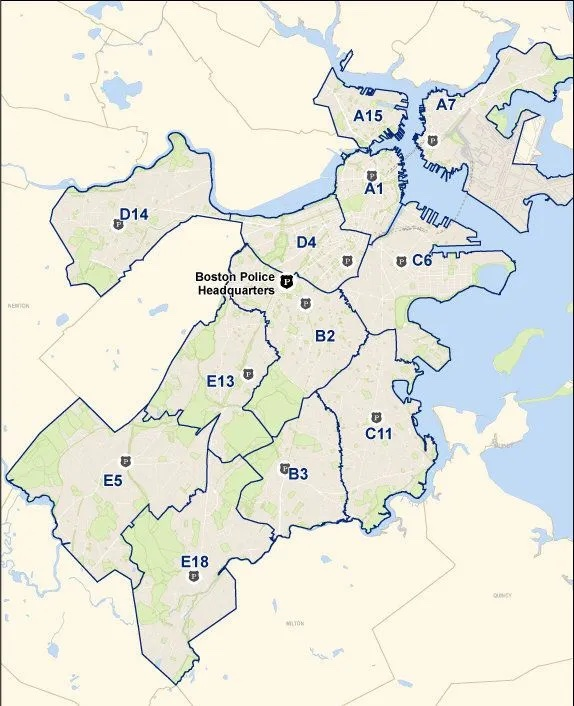

### 4. Distrik mana yang paling banyak menangani kasus yang melibatkan penembakan?

/var/folders/l6/2xk40zzj7w5918rd36xt33900000gn/T/ipykernel_26381/710944817.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



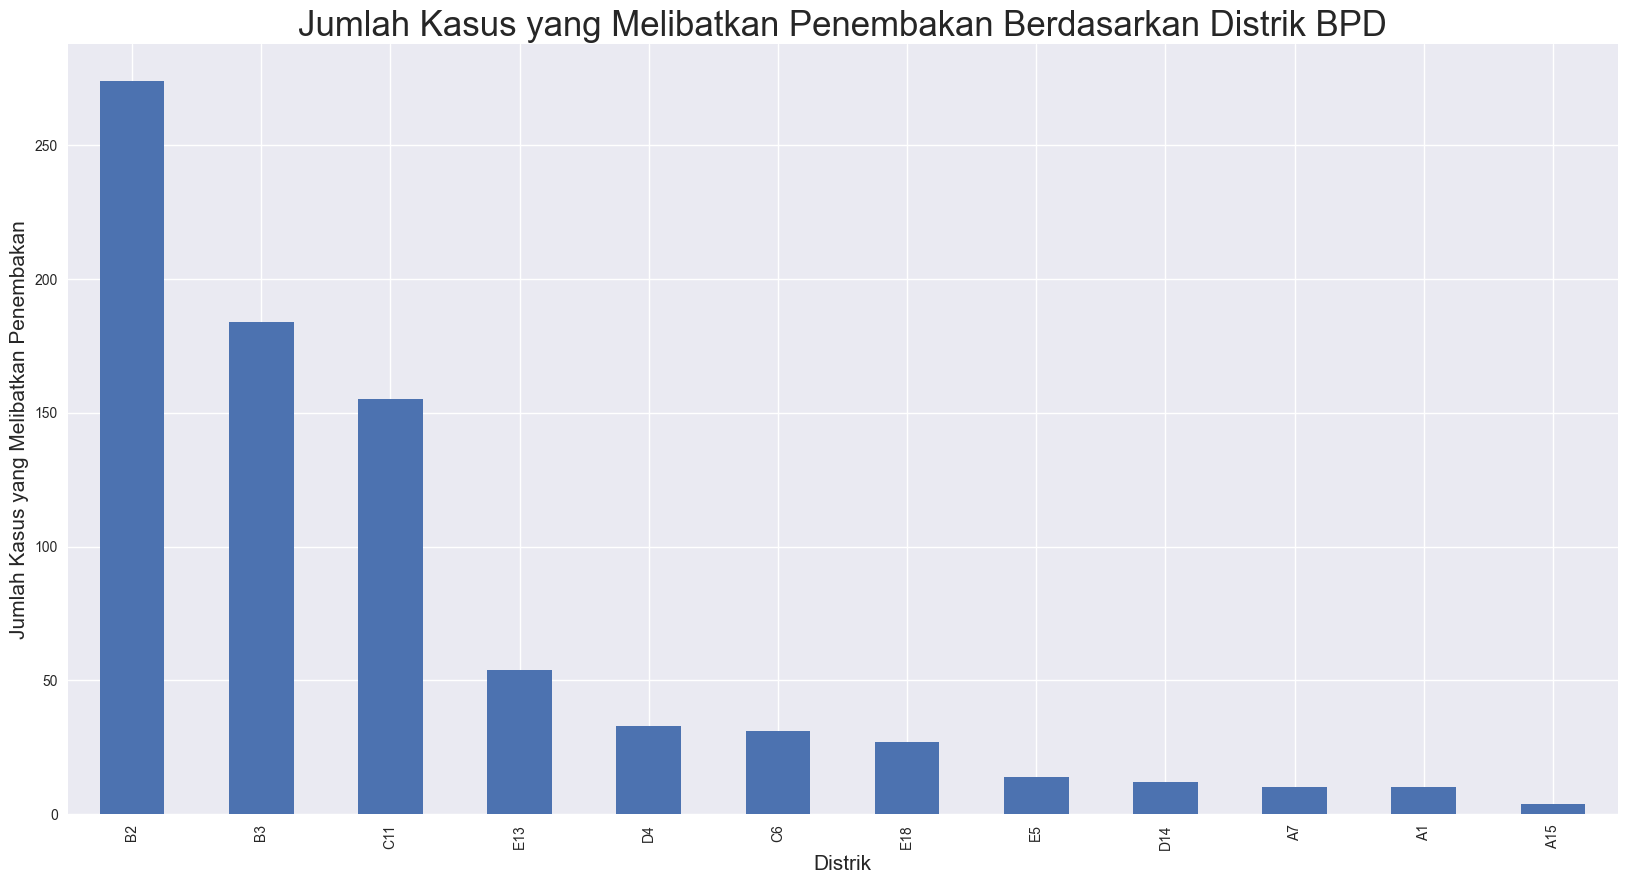

In [26]:
df_shoot = df.loc[df['SHOOTING'] == 'Y']
plt.style.use('seaborn')
plt.figure(figsize=(20,10))
df_shoot['DISTRICT'].value_counts().plot.bar()
plt.title('Jumlah Kasus yang Melibatkan Penembakan Berdasarkan Distrik BPD', fontsize=25)
plt.xlabel('Distrik', fontsize=15)
plt.ylabel('Jumlah Kasus yang Melibatkan Penembakan', fontsize=15)
plt.show()

Distrik B2 adalah distrik yang paling banyak menangani kasus yang melibatkan penembakan, diikuti oleh distrik B3, C11, dst.

In [27]:
# Menyimpan data yang sudah diolah dalam file CSV yang baru

df.to_csv('modul2_capstone_data_crime_edited.csv')

## KESIMPULAN DAN REKOMENDASI

__KESIMPULAN__
1. Jenis tindak kriminal yang paling sering terjadi adalah Larceny, yaitu pencurian barang milik orang lain (tidak termasuk pencurian kendaraan bermotor). Dalam 20 tindakan kriminal terbanyak yang terjadi di Boston, beberapa di antaranya masuk dalam kategori serupa dengan pencurian, seperti larceny, larceny from motor vehicle, residential burglary, auto theft, robbery, commercial burglary.
2. Tindakan kriminal paling banyak terjadi setiap hari pada pukul 12.00, 16.00-20.00, dan 00.00, tidak terlalu berpengaruh hari apa, hanya ada sedikit penurunan di akhir pekan dan sedikit kenaikan di hari Jumat. Berdasarkan waktu bulanan ada sedikit kenaikan jumlah insiden yang signifikan di bulan Juni-Agustus dikarenakan sekolah sedang libur dan musim panas sedang berlangsung. 
3. Daerah yang paling "panas" adalah daerah pusat kota Boston. Jika disesuaikan dengan lokasi distrik BPD, bisa kita lihat bahwa distrik A1,A15,A7 yang berpotensi mengalami lebih banyak kasus tindakan kriminal.
4. Berbeda dengan daerah yang banyak mengalami kasus tindakan kriminal, kejadian tindak kriminal yang melibatkan penembakan justru banyak terjadi di area tengah kota Boston, yang mencakup area distrik B2,B3,C11.

__REKOMENDASI__
1. Mengingat pencurian adalah kategori tindak kriminal yang banyak terjadi di kota Boston, petugas bisa memberikan program-program pencegahan kepada masyarakat, seperti pemberitahuan untuk menjaga barang-barang pribadinya dengan lebih ketat, memasang lebih banyak CCTV, serta meningkatkan petugas pengaman di area-area publik. 
2. Petugas BPD di distrik A1,A15,A7 perlu ditingkatkan lebih banyak secara kuantitas mengingat area tersebut memiliki riwayat tingkat kriminalitas yang cukup tinggi.
3. Petugas agar berpatroli lebih sering dengan jumlah petugas yang lebih banyak pada waktu-waktu rawan seperti pada pukul 12.00, 16.00-20.00, dan 00.00 setiap hari terutama di bulan Juni-Agustus. 
4. Petugas BPD di distrik B2,B3,C11 yang lebih sering menangani kasus yang melibatkan senjata api perlu dipersiapkan lebih matang agar lebih hati-hati dalam menghadapi kasus-kasus serupa.